_Lambda School Data Science_

# Make explanatory visualizations




Tody we will reproduce this [example by FiveThirtyEight:](https://fivethirtyeight.com/features/al-gores-new-movie-exposes-the-big-flaw-in-online-movie-ratings/)

In [1]:
from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png'
example = Image(url=url, width=400)

display(example)

Using this data: https://github.com/fivethirtyeight/data/tree/master/inconvenient-sequel

Objectives
- add emphasis and annotations to transform visualizations from exploratory to explanatory
- remove clutter from visualizations

Links
- [Strong Titles Are The Biggest Bang for Your Buck](http://stephanieevergreen.com/strong-titles/)
- [Remove to improve (the data-ink ratio)](https://www.darkhorseanalytics.com/blog/data-looks-better-naked)
- [How to Generate FiveThirtyEight Graphs in Python](https://www.dataquest.io/blog/making-538-plots/)

## Make prototypes

This  helps us understand the problem

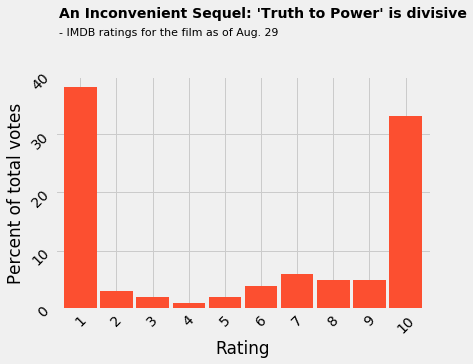

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


plt.style.use('fivethirtyeight')

fake = pd.Series([38, 3, 2, 1, 2, 4, 6, 5, 5, 33], 
                 index=range(1,11))

ax = fake.plot.bar(color='C1', width=0.9);
ax.tick_params(labelrotation=45)
#ax.set(title="An Inconvenient Sequel: 'Truth to Power' is divisive");

#Raw text objects in place of titles
ax.text(x=-0.6,y=50,s="An Inconvenient Sequel: 'Truth to Power' is divisive", fontweight='bold');
ax.text(x=-0.6, y=47, s= "- IMDB ratings for the film as of Aug. 29", fontsize=11);
ax.set(xlabel='Rating', ylabel='Percent of total votes',
      yticks = range(0,50,10));

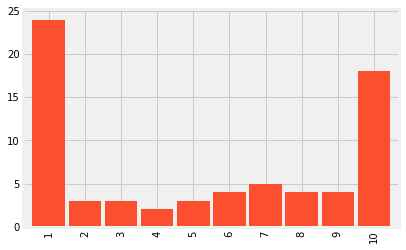

In [3]:
fake2 = pd.Series(
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
     2, 2, 2, 
     3, 3, 3,
     4, 4,
     5, 5, 5,
     6, 6, 6, 6,
     7, 7, 7, 7, 7,
     8, 8, 8, 8,
     9, 9, 9, 9, 
     10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10])

fake2.value_counts().sort_index().plot.bar(color='C1', width=0.9);

## Annotate with text

In [31]:
 display(example)

## Reproduce with real data

In [34]:
df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/inconvenient-sequel/ratings.csv')

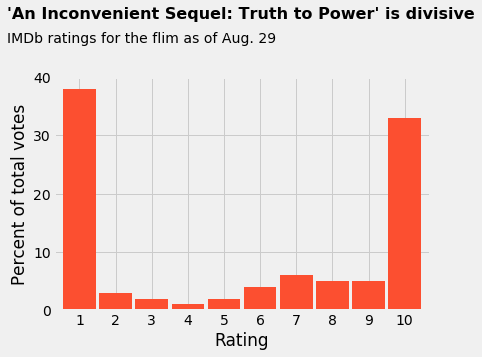

In [32]:
plt.style.use('fivethirtyeight')

fake = pd.Series([38, 3, 2, 1, 2, 4, 6, 5, 5, 33], 
                index=range(1,11))
ax = fake.plot.bar(color='C1', width=0.9)

ax.tick_params(labelrotation=0)

ax.text(x=-2, y=50, s="'An Inconvenient Sequel: Truth to Power' is divisive", 
       fontsize=16, fontweight='bold')
ax.text(x=-2, y=46, s= 'IMDb ratings for the flim as of Aug. 29')

ax.set(xlabel = 'Rating', 
      ylabel = 'Percent of total votes',
      yticks = range(0, 50, 10));

In [36]:
df.shape

(80053, 27)

In [37]:
width, height = df.shape
width * height

2161431

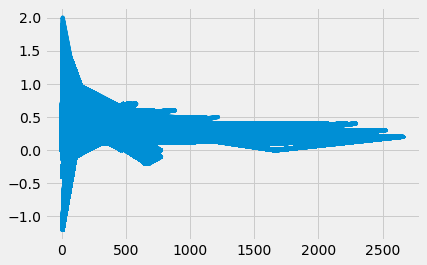

In [39]:
pd.options.display.max_columns = 500
df['mean minus avg'] = df['mean'] - df['average']
plt.plot(df['respondents'], df['mean minus avg'])
plt.show();

In [40]:
df.timestamp = pd.to_datetime(df.timestamp)

In [41]:
df.timestamp.describe()

count                          80053
unique                         80053
top       2017-07-24 23:00:02.760781
freq                               1
first     2017-07-17 12:28:32.785639
last      2017-08-29 23:10:06.218251
Name: timestamp, dtype: object

In [42]:
df = df.set_index('timestamp')

In [43]:
df['2017-08-29']

,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct,mean minus avg
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-08-29 00:00:02.248882,1682,Males,http://www.imdb.com/title/tt6322922/ratings-male,5.3,5.3,6,671,50,29,12,42,79,107,90,83,519,39.9,3.0,1.7,0.7,2.5,4.7,6.4,5.4,4.9,30.9,0.0
2017-08-29 00:00:02.499363,257,Females,http://www.imdb.com/title/tt6322922/ratings-fe...,6.9,7.3,10,53,3,4,4,4,5,14,13,26,131,20.6,1.2,1.6,1.6,1.6,1.9,5.4,5.1,10.1,51.0,0.4
2017-08-29 00:00:02.727204,15,Aged under 18,http://www.imdb.com/title/tt6322922/ratings-age_1,4.5,5.3,5,7,0,0,0,1,0,1,0,0,6,46.7,0.0,0.0,0.0,6.7,0.0,6.7,0.0,0.0,40.0,0.8
2017-08-29 00:00:03.024270,13,Males under 18,http://www.imdb.com/title/tt6322922/ratings-ma...,5.3,5.9,7,5,0,0,0,1,0,1,0,0,6,38.5,0.0,0.0,0.0,7.7,0.0,7.7,0.0,0.0,46.2,0.6
2017-08-29 00:00:03.248207,2,Females under 18,http://www.imdb.com/title/tt6322922/ratings-fe...,1.0,1.0,1,2,0,0,0,0,0,0,0,0,0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-08-29 00:00:03.441529,450,Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-age_2,6.4,6.6,8,117,3,6,7,17,24,35,28,23,190,26.0,0.7,1.3,1.6,3.8,5.3,7.8,6.2,5.1,42.2,0.2
2017-08-29 00:00:03.636825,402,Males Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-ma...,6.3,6.5,8,112,3,4,6,15,20,33,25,21,163,27.9,0.7,1.0,1.5,3.7,5.0,8.2,6.2,5.2,40.5,0.2
2017-08-29 00:00:03.839446,41,Females Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-fe...,7.1,7.9,10,4,0,2,1,2,2,2,3,2,23,9.8,0.0,4.9,2.4,4.9,4.9,4.9,7.3,4.9,56.1,0.8
2017-08-29 00:00:04.030663,771,Aged 30-44,http://www.imdb.com/title/tt6322922/ratings-age_3,5.6,5.6,7,287,21,12,4,21,36,53,38,49,250,37.2,2.7,1.6,0.5,2.7,4.7,6.9,4.9,6.4,32.4,0.0


In [44]:
df.category.value_counts()

Aged 18-29            4216
Males Aged 30-44      4216
Aged 30-44            4216
Top 1000 voters       4216
Aged under 18         4216
IMDb staff            4216
Females Aged 45+      4216
Non-US users          4216
Males                 4216
Females Aged 18-29    4216
Females               4216
US users              4216
Males under 18        4216
Aged 45+              4216
IMDb users            4216
Females Aged 30-44    4216
Males Aged 45+        4216
Males Aged 18-29      4216
Females under 18      4165
Name: category, dtype: int64

In [45]:
df[df.category=='IMDb users']

,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct,mean minus avg
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-07-17 12:28:36.697246,678,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.4,5,304,14,8,5,9,10,18,24,30,256,44.8,2.1,1.2,0.7,1.3,1.5,2.7,3.5,4.4,37.8,0.5
2017-07-17 12:34:21.250099,678,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.4,5,304,14,8,5,9,10,18,24,30,256,44.8,2.1,1.2,0.7,1.3,1.5,2.7,3.5,4.4,37.8,0.5
2017-07-17 13:00:06.506688,678,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.4,5,304,14,8,5,9,10,18,24,30,256,44.8,2.1,1.2,0.7,1.3,1.5,2.7,3.5,4.4,37.8,0.5
2017-07-17 14:00:06.727742,679,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.3,5,305,14,8,5,9,10,18,24,30,256,44.9,2.1,1.2,0.7,1.3,1.5,2.7,3.5,4.4,37.7,0.4
2017-07-17 15:00:06.055125,679,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.3,5,305,14,8,5,9,10,18,24,30,256,44.9,2.1,1.2,0.7,1.3,1.5,2.7,3.5,4.4,37.7,0.4
2017-07-17 16:00:06.023053,679,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.3,5,305,14,8,5,9,10,18,24,30,256,44.9,2.1,1.2,0.7,1.3,1.5,2.7,3.5,4.4,37.7,0.4
2017-07-17 17:00:06.142993,679,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.3,5,305,14,8,5,9,10,18,24,30,256,44.9,2.1,1.2,0.7,1.3,1.5,2.7,3.5,4.4,37.7,0.4
2017-07-17 18:00:06.510891,680,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.3,5,306,14,8,5,9,10,18,24,30,256,45.0,2.1,1.2,0.7,1.3,1.5,2.6,3.5,4.4,37.6,0.4
2017-07-17 19:00:06.666467,680,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.3,5,306,14,8,5,9,10,18,24,30,256,45.0,2.1,1.2,0.7,1.3,1.5,2.6,3.5,4.4,37.6,0.4


In [46]:
lastday = df['2017-08-29']

In [47]:
lastday[lastday.category=='IMDb users']

,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct,mean minus avg
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-08-29 00:00:06.288486,2646,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1020,67,39,24,55,107,152,145,144,893,38.5,2.5,1.5,0.9,2.1,4.0,5.7,5.5,5.4,33.7,0.2
2017-08-29 00:10:06.763461,2646,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1020,67,39,24,55,107,152,145,144,893,38.5,2.5,1.5,0.9,2.1,4.0,5.7,5.5,5.4,33.7,0.2
2017-08-29 00:20:05.745307,2646,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1020,67,39,24,55,107,152,145,144,893,38.5,2.5,1.5,0.9,2.1,4.0,5.7,5.5,5.4,33.7,0.2
2017-08-29 00:30:05.818552,2646,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1020,67,39,24,55,107,152,145,144,893,38.5,2.5,1.5,0.9,2.1,4.0,5.7,5.5,5.4,33.7,0.2
2017-08-29 00:40:06.180928,2646,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1020,67,39,24,55,107,152,145,144,893,38.5,2.5,1.5,0.9,2.1,4.0,5.7,5.5,5.4,33.7,0.2
2017-08-29 00:50:05.826082,2646,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1020,67,39,24,55,107,152,145,144,893,38.5,2.5,1.5,0.9,2.1,4.0,5.7,5.5,5.4,33.7,0.2
2017-08-29 01:00:05.483262,2646,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1020,67,39,24,55,107,152,145,144,893,38.5,2.5,1.5,0.9,2.1,4.0,5.7,5.5,5.4,33.7,0.2
2017-08-29 01:10:06.038644,2646,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1020,67,39,24,55,107,152,145,144,893,38.5,2.5,1.5,0.9,2.1,4.0,5.7,5.5,5.4,33.7,0.2
2017-08-29 01:20:05.807155,2646,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1020,67,39,24,55,107,152,145,144,893,38.5,2.5,1.5,0.9,2.1,4.0,5.7,5.5,5.4,33.7,0.2


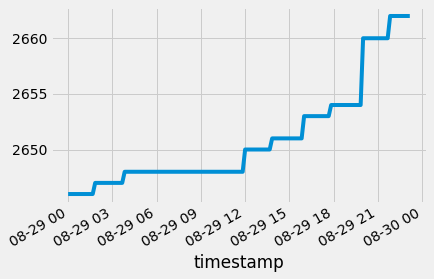

In [48]:
lastday[lastday.category=='IMDb users'].respondents.plot();

In [50]:
final = df.tail(1)
columns = [str(i) + '_pct' for i in range(1, 11)]
final[columns]

,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,
2017-08-29 23:10:06.218251,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7


In [52]:
data = final[columns].T

In [53]:
data.index = range(1,11)

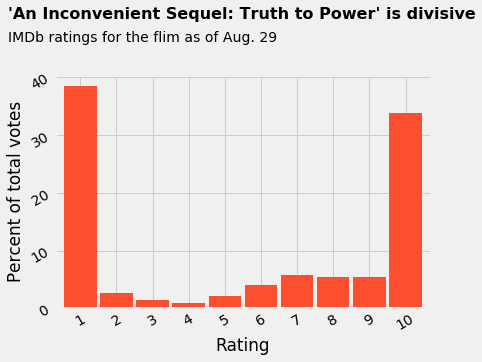

In [55]:
plt.style.use('fivethirtyeight')

ax = data.plot.bar(color='C1', width=0.9, legend=False)

ax.tick_params(labelrotation=30)

ax.text(x=-2, y=50, s="'An Inconvenient Sequel: Truth to Power' is divisive", 
       fontsize=16, fontweight='bold')

ax.text(x=-2, y=46, s= 'IMDb ratings for the flim as of Aug. 29')

ax.set(xlabel = 'Rating', 
      ylabel = 'Percent of total votes',
      yticks = range(0, 50, 10));

# ASSIGNMENT

Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

# STRETCH OPTIONS

#### Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

If you aren't sure what to choose, try:
- the chart titled ["Men dominated Al Gore's IMDb movie rating"](https://fivethirtyeight.com/features/al-gores-new-movie-exposes-the-big-flaw-in-online-movie-ratings/)
- or the tutorial, [How to Generate FiveThirtyEight Graphs in Python](https://www.dataquest.io/blog/making-538-plots/)

Other options include:
- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) (try the [`altair`](https://altair-viz.github.io/gallery/index.html#maps) library)
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) (try the [`statsmodels`](https://www.statsmodels.org/stable/index.html) library)
- or another example of your choice!

#### Make more charts!

Choose a chart you want to make, from [FT's Visual Vocabulary poster](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!









In [58]:
oildf = pd.read_excel('monthly_oil_production.xls')

In [60]:
print (oildf.head())

        Date  MCRFPUS1  MCRFPP11  MCRFPFL1  MCRFPNY1  MCRFPPA1  MCRFPVA1  \
0 1920-01-15     34008       NaN       NaN       NaN       NaN       NaN   
1 1920-02-15     33193       NaN       NaN       NaN       NaN       NaN   
2 1920-03-15     36171       NaN       NaN       NaN       NaN       NaN   
3 1920-04-15     34945       NaN       NaN       NaN       NaN       NaN   
4 1920-05-15     36622       NaN       NaN       NaN       NaN       NaN   

   MCRFPWV1  MCRFPP21  MCRFPIL1  MCRFPIN1  MCRFPKS1  MCRFPKY1  MCRFP_SMI_1  \
0       NaN       NaN       NaN       NaN       NaN       NaN          NaN   
1       NaN       NaN       NaN       NaN       NaN       NaN          NaN   
2       NaN       NaN       NaN       NaN       NaN       NaN          NaN   
3       NaN       NaN       NaN       NaN       NaN       NaN          NaN   
4       NaN       NaN       NaN       NaN       NaN       NaN          NaN   

   MCRFPMO1  MCRFPNE1  MCRFPND1  MCRFPOH1  MCRFPOK1  MCRFPSD1  MCRFPTN1  \

In [62]:
oildf.shape

(1186, 43)

In [70]:
oildf.columns = ['Date', 'Total U.S.', 'East Coast', 'Florida', 'New York', 'Pennsylvania', 'Virginia,', 'West Virginia', 'Midwest', 'Illinois', 'Indiana', 'Kansas', 'Kentucky', 'Michigan', 'Missouri', 'Nebraska', 'North Dakota', 'Ohio', 'Oklahoma', 'South Dakota', 'Tennessee', 'Gulf Coast', 'Alabama', 'Arkansas', 'Louisiana', 'Mississippi', 'New Mexico', 'Texas', 'Gulf Offshore', 'Rocky Mountains', 'Colorado', 'Idaho', 'Montana', 'Utah', 'Wyoming', 'West Coast', 'Alaska', 'South Alaska', 'North Alaska', 'Arizona', 'California', 'Nevada', 'West Coast Offshore']
oildf.head()

,Date,Total U.S.,East Coast,Florida,New York,Pennsylvania,"Virginia,",West Virginia,Midwest,Illinois,Indiana,Kansas,Kentucky,Michigan,Missouri,Nebraska,North Dakota,Ohio,Oklahoma,South Dakota,Tennessee,Gulf Coast,Alabama,Arkansas,Louisiana,Mississippi,New Mexico,Texas,Gulf Offshore,Rocky Mountains,Colorado,Idaho,Montana,Utah,Wyoming,West Coast,Alaska,South Alaska,North Alaska,Arizona,California,Nevada,West Coast Offshore
0,1920-01-15,34008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1920-02-15,33193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1920-03-15,36171,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1920-04-15,34945,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1920-05-15,36622,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
oildf['Date'] = pd.to_datetime(oildf['Date'])

In [80]:
import datetime
thisMillenia = oildf[oildf['Date'] >= datetime.date(2000, 1, 1)]

/anaconda2/envs/py3k/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  


In [81]:
thisMillenia.head()

,Date,Total U.S.,East Coast,Florida,New York,Pennsylvania,"Virginia,",West Virginia,Midwest,Illinois,Indiana,Kansas,Kentucky,Michigan,Missouri,Nebraska,North Dakota,Ohio,Oklahoma,South Dakota,Tennessee,Gulf Coast,Alabama,Arkansas,Louisiana,Mississippi,New Mexico,Texas,Gulf Offshore,Rocky Mountains,Colorado,Idaho,Montana,Utah,Wyoming,West Coast,Alaska,South Alaska,North Alaska,Arizona,California,Nevada,West Coast Offshore
960,2000-01-15,179316,606.0,360.0,16.0,111.0,0.0,118.0,14341.0,997.0,179.0,3062.0,128.0,481.0,8.0,240.0,2766.0,510.0,5844.0,98.0,28.0,97380.0,934.0,578.0,9132.0,1594.0,5846.0,38241.0,41055.0,9496.0,1631.0,NaN,1314.0,1366.0,5185.0,57493.0,31751.0,935.0,30816.0,5.0,22784.0,56.0,2898.0
961,2000-02-15,169703,564.0,349.0,19.0,108.0,0.0,88.0,13905.0,1027.0,170.0,2804.0,267.0,145.0,7.0,228.0,2627.0,507.0,5996.0,87.0,40.0,92304.0,858.0,592.0,8580.0,1465.0,5503.0,36030.0,39277.0,8884.0,1494.0,NaN,1244.0,1275.0,4872.0,54045.0,29906.0,885.0,29021.0,3.0,21332.0,53.0,2751.0
962,2000-03-15,183464,662.0,373.0,19.0,145.0,1.0,124.0,15242.0,1025.0,187.0,2859.0,394.0,797.0,9.0,249.0,2818.0,661.0,6112.0,96.0,35.0,100736.0,919.0,624.0,9183.0,1669.0,5802.0,38258.0,44281.0,9490.0,1615.0,NaN,1327.0,1348.0,5201.0,57334.0,31395.0,823.0,30571.0,3.0,22865.0,55.0,3016.0
963,2000-04-15,175625,624.0,385.0,16.0,108.0,1.0,114.0,14292.0,1030.0,166.0,2841.0,306.0,507.0,8.0,246.0,2722.0,500.0,5843.0,98.0,25.0,96156.0,887.0,601.0,8795.0,1625.0,5649.0,36836.0,41762.0,9098.0,1521.0,NaN,1287.0,1290.0,5001.0,55455.0,30241.0,893.0,29348.0,2.0,22234.0,52.0,2927.0
964,2000-05-15,181242,692.0,411.0,17.0,130.0,1.0,133.0,14954.0,1035.0,185.0,2967.0,237.0,797.0,9.0,250.0,2804.0,567.0,5978.0,99.0,26.0,100057.0,905.0,623.0,8943.0,1701.0,5841.0,37606.0,44438.0,9402.0,1568.0,NaN,1320.0,1317.0,5197.0,56137.0,29934.0,909.0,29025.0,5.0,23086.0,52.0,3059.0


Text(0.5, 1.0, 'Oil Production by Year')

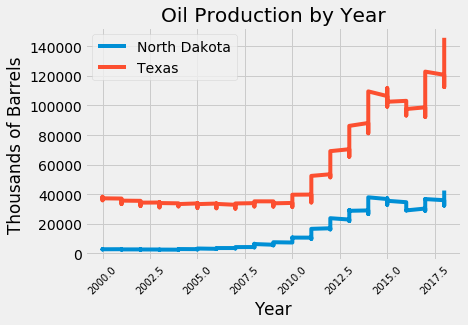

In [132]:
#print (thisMillenia.head())
#thisMillenia['Date'] = thisMillenia['Date'].dt.year
plt.style.use('fivethirtyeight')

#ax = thisMillenia.plot.line(color='C1')
x = thisMillenia['Date']
y = (thisMillenia['Texas'])
y2 = (thisMillenia['North Dakota'])
set_xlim= (2000, 2019)
ylim=((y+y2)*2)
plt.plot(x, y2)
plt.plot(x,y)
plt.xticks(rotation=45, fontsize=10)
plt.legend(['North Dakota', 'Texas'])
plt.xlabel('Year')
plt.ylabel('Thousands of Barrels')
plt.title('Oil Production by Year')